In [ ]:
import pandas as pd

df = pd.read_csv("Customers.csv")
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income'}, inplace=True)

In [ ]:
print(df.head())

   CustomerID   Genre  Age  Annual_Income  Spending Score (1-100)
0           1    Male   19             15                      39
1           2    Male   21             15                      81
2           3  Female   20             16                       6
3           4  Female   23             16                      77
4           5  Female   31             17                      40


In [ ]:
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual_Income             0
Spending Score (1-100)    0
dtype: int64


In [ ]:
df = df.dropna()
features = df[['Annual_Income' ,  'Spending Score (1-100)']]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
from sklearn.cluster import KMeans
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(df['Cluster'].value_counts())

Cluster
0    123
2     39
1     38
Name: count, dtype: int64


In [ ]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(cluster_centers)


[[44.15447154 49.82926829]
 [87.         18.63157895]
 [86.53846154 82.12820513]]


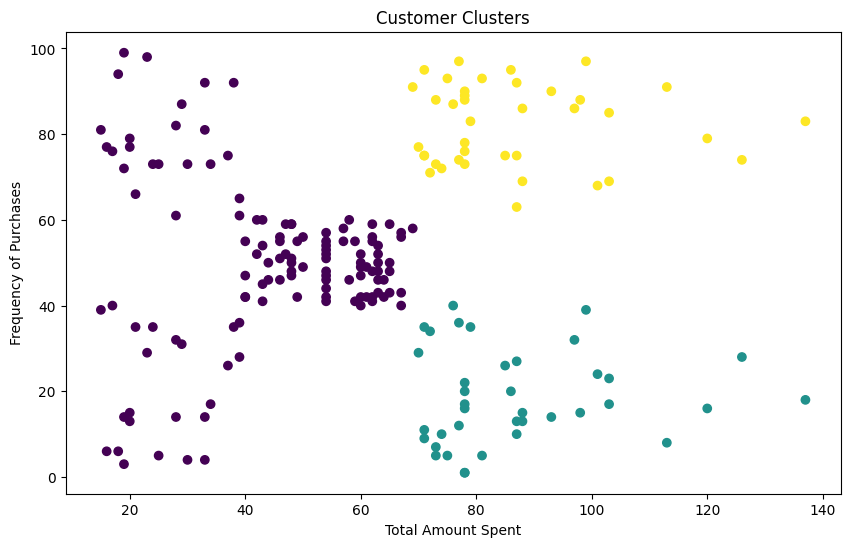

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual_Income'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Total Amount Spent')
plt.ylabel('Frequency of Purchases')
plt.title('Customer Clusters')
plt.show()
